# **Playing With Matrices Assignments**

In [2]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import cv2

## **1)** a) Creating a filled-square in an image:
> In this task we will have to take the length, breath of the square and coordinates of the top left pixel of the square as an input from the user. A filled square of the given coordinates and dimensions should be created in the image.

|  |  |
|:----:|:----:|
|**INPUT IMAGE** | **OUTPUT IMAGE**|
|![](./images/blur.jpeg)|!![](./images/blur_square.png)|

## b) Creating a filled-circle in an image:
> In this task we will have to take the radius and coordinates of the center of the circle as an input from the user. A filled circle of the given coordinates and dimensions should be created in the image.

|  |  |
|:----:|:----:|
|**INPUT IMAGE** | **OUTPUT IMAGE**|
|![](./images/blur.jpeg)|![](./images/blur_circle.png)|

## **2)** a) Creating a hollow square in an image 
> In this Sub-task we will have to take the length, breadth, thickness of the border of the square and coordinates of the top left pixel of the square as an input from the user. A hollow square of the given coordinates and dimensions should be created in the image.

|  |  |
|:----:|:----:|
|**INPUT IMAGE** | **OUTPUT IMAGE**|
|![](./images/blur.jpeg)|![](./images/blur_hollow_sqaure.png)|

* **b)** Creating a hollow circle in an image
> In this task we will have to take the radius and coordinates of the center of the circle and also the thickness of the border as an input from the user. A hollow circle of the given coordinates and dimensions should be created in the image.

|  |  |
|:----:|:----:|
|**INPUT IMAGE** | **OUTPUT IMAGE**|
|![](./images/blur.jpeg)|![](./images/blur_hollow_circle.png)|

## 3) Rotating an image by 180 degrees
> In this task you will have to Rotate the given image by 180 degrees.

```Note : You cannot use the method we used in the demo```

|  |  |
|:----:|:----:|
|**INPUT IMAGE** | **OUTPUT IMAGE**|
|![](./images/blur.jpeg)|![](./images/blur_180.png)|

Size of image :  304 x 244


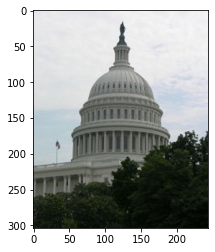

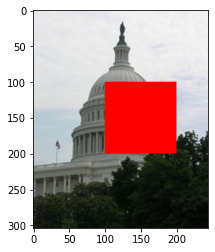

In [32]:
#Task 1(a)


i,j,l = 100, 100, 100

image = plt.imread('blur.jpeg')     
print("Size of image : ",image.shape[0],"x",image.shape[1])                           


image1 = np.zeros((image.shape[0],image.shape[1],image.shape[2]),dtype = image.dtype) 
image1 = np.copy(image)

for i in range(100,200):
    image1[i,j:j+l] = [255,0,0]



plt.figure()
plt.imshow(image1)

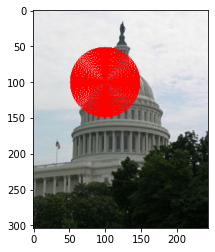

In [61]:
#task 1(b)

image = plt.imread('blur.jpeg')     
                         

image1 = np.zeros((image.shape[0],image.shape[1],image.shape[2]),dtype = image.dtype) 
image1 = np.copy(image)

for i in range(50):
    cv2.circle(image,(100, 100), i, (255,0,0))
plt.figure()
plt.imshow(image)





Size of image :  304 x 244


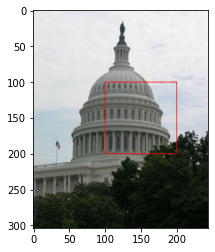

In [50]:
#task 2(a)



i,j,l = 100, 100, 100
x,y,z = 200, 100, 100
x1,y1,z1 = 100,200,100
 

image = plt.imread('blur.jpeg')     
                        

image1 = np.zeros((image.shape[0],image.shape[1],image.shape[2]),dtype = image.dtype) 
image1 = np.copy(image)

image1[i,j:j+l] = [255,0,0]
image1[x,y:y+z] = [255,0,0]
image1[i:i+l,j] = [255,0,0]
image1[x1:x1+z1,y1] = [255,0,0]
 


plt.figure()
plt.imshow(image1)

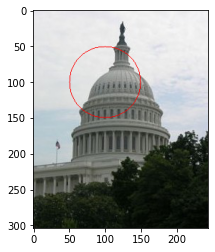

In [56]:
#task 2(b)
image = plt.imread('blur.jpeg')     
                         
cv2.circle(image,(100, 100), 50, (255,0,0))
plt.figure()
plt.imshow(image)

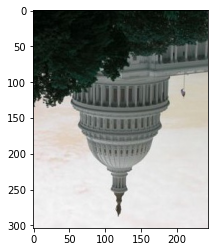

In [68]:
#task 3

image = plt.imread('blur.jpeg')
img_rotate_180 = cv2.rotate(image, cv2.ROTATE_180)
cv2.imwrite('blur.jpeg', img_rotate_180)

plt.figure
plt.imshow(image)



## Bonus Task

Write the code to rotate the given image by any arbitary angle, as can be seen in the example below. try both bound and non-bound. 

``` Do not use any inbuilt function for this task. Use only Numpy for rotation```

<img width="640" height="450" src="./images/rotate.png">  

**OUTPUT**

|<img width="640" height="450" src="./images/rotate-no-bound.png">|<img width="640" height="450" src="./images/rotate-bound.png">|
|:---:|:---:|
|No Bound|Bound|

Enter the angle :- 45


AttributeError: 'numpy.ndarray' object has no attribute 'fromarray'

# **Convolution Tasks**

***Reference*** code : 

In [1]:
#############Suboptimal implementation of convolution #####################
import cv2
import numpy as np
import matplotlib.pyplot as plt

def convolve(kernel, orig_img):
    #####################Flip kernel suboptimally####################
    kernel_inv = np.copy(kernel)
    kernel_inv[0] = kernel[2]
    kernel_inv[2] = kernel[0]
    kernel_inv[:, 0] = kernel_inv[:, 2]
    kernel_inv[:, 2] = kernel_inv[:, 0]
    #################################################################
    img = cv2.copyMakeBorder(orig_img, 1, 1, 1, 1, cv2.BORDER_CONSTANT) # Add padding
    res_img = orig_img()
    for i in range(1, img.shape[0] - 1):
        for j in range(1, img.shape[1] - 1):
                res_img[i - 1, j - 1] = np.sum(img[i - 1 : i + 2, j - 1 : j + 2] * kernel_inv[:, :])
    return res_img
  
orig_img = cv2.imread("./Assets/dog_test.png", 0) # Read Image
kernel = np.array([[ 1,  1,  1], [ 0,  0,  0], [-1, -1, -1]]) # Simple vertical gradient kernel

res = convolve(kernel, orig_img)

orig = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
plt.imshow(orig)
plt.show()
plt.imshow(res, cmap = plt.cm.gray)
plt.show()


TypeError: 'NoneType' object is not callable

## Q1. Implement Sobel edge detection with 3x3 Sobel kernels in vertical as well horizontal direction.

## Q2. Apply Gaussian smoothing using normal 2D convolution.

## Q3. Apply Gaussian smoothing using separable 2D convolution.

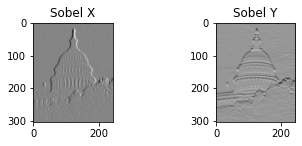

In [32]:
#Q1


import cv2
import numpy as np
from matplotlib import pyplot as plt


img0 = cv2.imread('blur.jpeg')


gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)


img = cv2.GaussianBlur(gray,(3,3),0)

# convolute with proper kernels
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y


plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X')
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y')

plt.show()

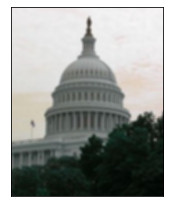

In [2]:
#q2

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('blur.jpeg')

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)


plt.subplot(122),plt.imshow(dst)
plt.xticks([]), plt.yticks([])
plt.show()

# **Morphology Assignments**

## Task 1

Write a code to perform Dilation only using libraries like Numpy, PIL


### Algorithm

* Initialize an array with all elements as zero and of size equal to input size. Hint => Use np.zeroes_like()


* Create a padded image. Hint => Use np.zeros()


* Assign the pixels of image to padded image.


* Create 2 for loops to loop through each pixel and convolute.

* If result is greater than 0 output should be 1 else 0




In [10]:
import numpy as np
from PIL import Image

img = Image.open(r"C:\Users\Siddharth\OneDrive\Desktop\pixels_repo\Pixels_Seminar\3_cv_basics\images\Cric_ball.jpeg")

imgbw = img.convert("L")
binimg = imgbw.convert("1")

# First convert your input rgb image to grayscale
# Then convert grayscale image to binary

# Use this kernel
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]])




binimg.show()

## Task 2

Write a code to perform Erosion only using libraries like Numpy, PIL


### Algorithm

* Initialize an array with all elements as zero and of size equal to input size. Hint => Use np.zeroes_like()


* Create a padded image. Hint => Use np.zeros()


* Assign the pixels of image to padded image:


* Create 2 for loops to loop through each pixel and convolute.

* If result is 5 then output should be 1 else 0.

In [ ]:
# First convert your input rgb image to grayscale
# Then convert grayscale image to binary

# Google the kernel used for erosion

# Write your code for Erosion here

## Bonus Task:

Write a code to perform Opening, Closing and Gradient using Numpy, PIL

# **OpenCV Assignments**

## Task 1

Read an Image and Apply Filters to Detect Edges using OpenCV functions:

1. Canny Edge Detection

![](https://miro.medium.com/max/566/1*XAgKINgc2c2gNa2nV3zbNQ.png)


2. Sobel Edge Detection

![](https://gtms1337.files.wordpress.com/2013/03/cameraman.png)


Apply Filters to Blur an Image:

1. Gaussian Filter
2. Median Filter
3. Box Filter

![](https://miro.medium.com/max/1200/1*BYhANv5m95gdqbfFIg8Msg.jpeg)


## Bonus Task

Apply Edge Detection and Blur Filters on a video

In [ ]:
# Write your Code Here

# Edge Detection


# Blur Filters

In [ ]:
# Write your Code Here

# Erosion

# Dilation

# Gradient

## Task 2

Apply OpenCV Functions to perform Morphological Operations:

1. Erosion
2. Dilation
3. Gradient

![](https://static.packt-cdn.com/products/9781785283932/graphics/B04554_02_15.jpg)

## Task 3

* Blur and Downsample an image using a single function
* Blur and Upsample an image using a single function
* Calculate the first order image derivative in both x and y using a Sobel operator.


In [ ]:
# Write your Code Here



# Bonus Task


## TASK 2
Playing With Contours
* Refer [OpenCV docs](https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html) and study the types of contours
* Task is to find 4 points i.e. leftmost rightmost top and bottom point as shown in the image below.

**INPUT**
![](./images/contour_input.jpeg)

**OUTPUT**
![](./images/contour_output1.jpeg)
![](./images/contour_output2.jpeg)